In [15]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv', low_memory=False)

In [17]:
flights = flights[flights['MONTH'] == 1]

In [18]:
flights[['ELAPSED_TIME','TAXI_IN','AIR_TIME','TAXI_OUT','ARRIVAL_TIME','WHEELS_ON','WHEELS_OFF','ARRIVAL_DELAY','DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_TIME','SCHEDULED_ARRIVAL','SCHEDULED_DEPARTURE']][0:5]

,ELAPSED_TIME,TAXI_IN,AIR_TIME,TAXI_OUT,ARRIVAL_TIME,WHEELS_ON,WHEELS_OFF,ARRIVAL_DELAY,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,SCHEDULED_ARRIVAL,SCHEDULED_DEPARTURE
0,194.0,4.0,169.0,21.0,408.0,404.0,15.0,-22.0,2354.0,-11.0,205.0,430,5
1,279.0,4.0,263.0,12.0,741.0,737.0,14.0,-9.0,2.0,-8.0,280.0,750,10
2,293.0,11.0,266.0,16.0,811.0,800.0,34.0,5.0,18.0,-2.0,286.0,806,20
3,281.0,8.0,258.0,15.0,756.0,748.0,30.0,-9.0,15.0,-5.0,285.0,805,20
4,215.0,5.0,199.0,11.0,259.0,254.0,35.0,-21.0,24.0,-1.0,235.0,320,25


In [19]:
missing_flights_data = {}
for item in flights.columns:
    missing_flights_data[item] = flights[item].isnull().values.ravel().sum()
missing_flights_data

{'YEAR': 0,
 'MONTH': 0,
 'DAY': 0,
 'DAY_OF_WEEK': 0,
 'AIRLINE': 0,
 'FLIGHT_NUMBER': 0,
 'TAIL_NUMBER': 2782,
 'ORIGIN_AIRPORT': 0,
 'DESTINATION_AIRPORT': 0,
 'SCHEDULED_DEPARTURE': 0,
 'DEPARTURE_TIME': 11657,
 'DEPARTURE_DELAY': 11657,
 'TAXI_OUT': 11876,
 'WHEELS_OFF': 11876,
 'SCHEDULED_TIME': 0,
 'ELAPSED_TIME': 12955,
 'AIR_TIME': 12955,
 'DISTANCE': 0,
 'WHEELS_ON': 12271,
 'TAXI_IN': 12271,
 'SCHEDULED_ARRIVAL': 0,
 'ARRIVAL_TIME': 12271,
 'ARRIVAL_DELAY': 12955,
 'DIVERTED': 0,
 'CANCELLED': 0,
 'CANCELLATION_REASON': 457986,
 'AIR_SYSTEM_DELAY': 374017,
 'SECURITY_DELAY': 374017,
 'AIRLINE_DELAY': 374017,
 'LATE_AIRCRAFT_DELAY': 374017,
 'WEATHER_DELAY': 374017}

In [20]:
unique_flights_data = {}
for item in flights.columns:
    unique_flights_data[item] = flights[item].unique()
#unique_flights_data

In [21]:
flights.YEAR.unique() #2015
day_of_week_desc={
    7:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}
flights['DESC_DOW']=flights['DAY_OF_WEEK'].apply(lambda a:day_of_week_desc[a])
flights.head()['DESC_DOW']

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: DESC_DOW, dtype: object

In [22]:
airlines_dict = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
airport_dict = dict(zip(airports['IATA_CODE'],airports['AIRPORT']))
flights['DESC_AIRLINE'] = flights['AIRLINE'].apply(lambda x: airlines_dict[x])
flights.head()['DESC_AIRLINE']

0      Alaska Airlines Inc.
1    American Airlines Inc.
2           US Airways Inc.
3    American Airlines Inc.
4      Alaska Airlines Inc.
Name: DESC_AIRLINE, dtype: object

In [23]:
# flights.CANCELLED.unique() #0,1
#Each airline is either cancelled or operated.
rank_airlines = pd.DataFrame(flights.groupby('DESC_AIRLINE').count()['SCHEDULED_DEPARTURE'])
rank_airlines['CANCELLED']=flights.groupby('DESC_AIRLINE').sum()['CANCELLED']
rank_airlines['OPERATED']=rank_airlines['SCHEDULED_DEPARTURE']-rank_airlines['CANCELLED']
rank_airlines['RATIO_OP_SCH']=rank_airlines['OPERATED']/rank_airlines['SCHEDULED_DEPARTURE']
rank_airlines.drop(rank_airlines.columns[[0,1,2]],axis=1,inplace=True)
rank_airlines.head()

,RATIO_OP_SCH
DESC_AIRLINE,
Alaska Airlines Inc.,0.995172
American Airlines Inc.,0.979573
American Eagle Airlines Inc.,0.923478
Atlantic Southeast Airlines,0.965909
Delta Air Lines Inc.,0.989475


Text(0.5, 1.0, 'Ratio of operated and scheduled flights for each airlines in increasing order')

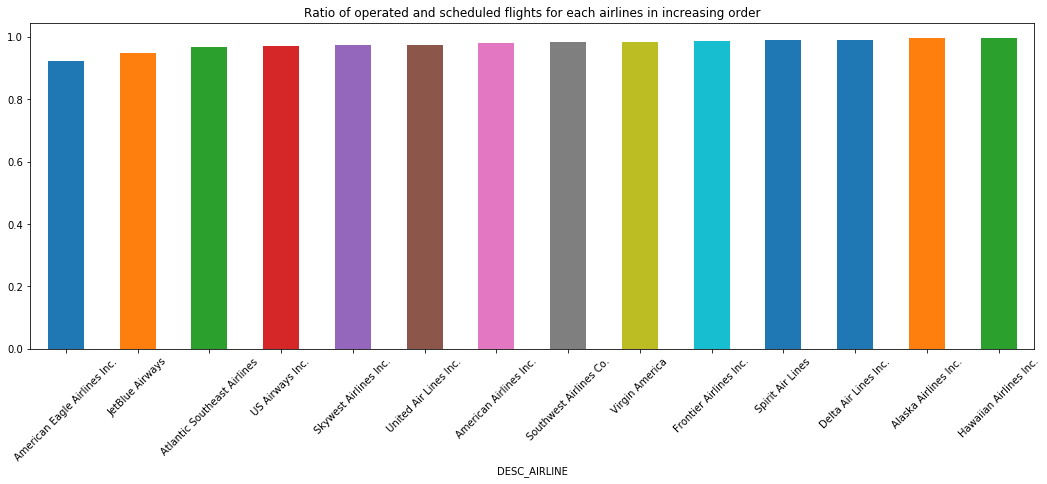

In [24]:
rank_airlines.sort_values(['RATIO_OP_SCH'],ascending = 1,inplace=True)
# rank_airlines.head()
rank_airlines['RATIO_OP_SCH'].plot(kind='bar',figsize=(18,6),rot=45)
plt.title('Ratio of operated and scheduled flights for each airlines in increasing order')

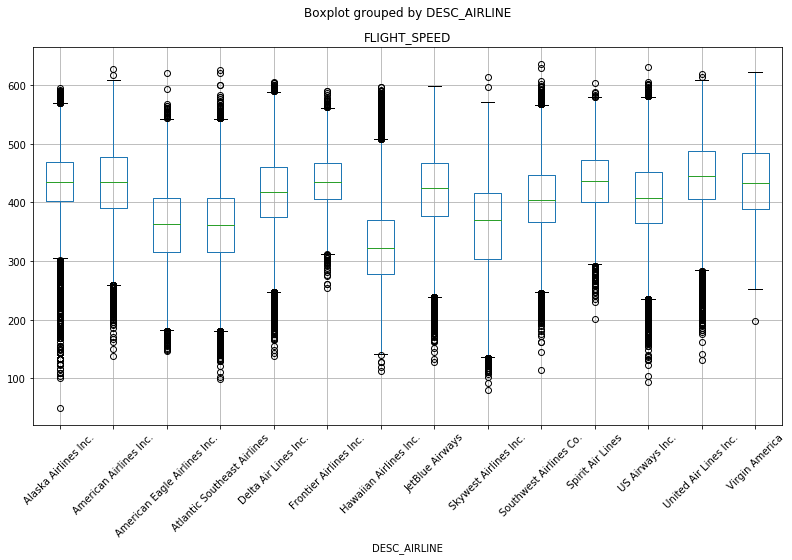

In [25]:
flights['FLIGHT_SPEED'] = 60*flights['DISTANCE']/flights['AIR_TIME']
rank_airlines['FLIGHT_SPEED'] = flights.groupby('DESC_AIRLINE')['FLIGHT_SPEED'].mean()
flights[['DESC_AIRLINE','FLIGHT_SPEED']].boxplot(column = 'FLIGHT_SPEED',by='DESC_AIRLINE',figsize=(13,7),rot=45)

In [26]:
rank_airlines.head()

,RATIO_OP_SCH,FLIGHT_SPEED
DESC_AIRLINE,,
American Eagle Airlines Inc.,0.923478,361.329625
JetBlue Airways,0.949036,416.728409
Atlantic Southeast Airlines,0.965909,361.540303
US Airways Inc.,0.971364,406.945338
Skywest Airlines Inc.,0.973771,358.274238


In [27]:
flights.groupby('DESC_AIRLINE')[['ARRIVAL_DELAY','DEPARTURE_DELAY']].mean()
#Let's add arrival delay to our ranking module as well.
rank_airlines['ARRIVAL_DELAY']= flights.groupby('DESC_AIRLINE')['ARRIVAL_DELAY'].mean()
#As our flight speed is in miles/hour,it's probably best to keep ARRIVAL DELAY in hours.
rank_airlines['ARRIVAL_DELAY']=rank_airlines['ARRIVAL_DELAY'].apply(lambda x:x/60)
rank_airlines.head()

,RATIO_OP_SCH,FLIGHT_SPEED,ARRIVAL_DELAY
DESC_AIRLINE,,,
American Eagle Airlines Inc.,0.923478,361.329625,0.302750
JetBlue Airways,0.949036,416.728409,0.122455
Atlantic Southeast Airlines,0.965909,361.540303,0.142292
US Airways Inc.,0.971364,406.945338,0.051791
Skywest Airlines Inc.,0.973771,358.274238,0.181498


[Text(0.5, 0, 'Mean flight delays (Arrival : Green,Departure : Yellow)')]

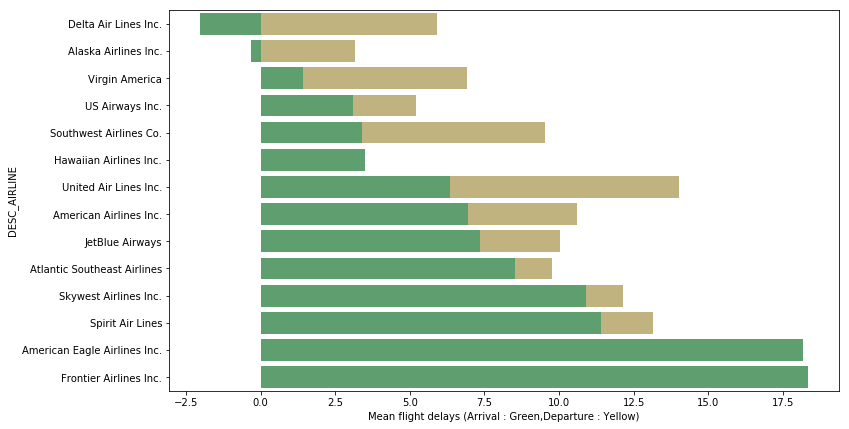

In [28]:
df_delay = pd.DataFrame(flights.groupby('DESC_AIRLINE')[['ARRIVAL_DELAY','DEPARTURE_DELAY']].mean())
df_delay.sort_values(['ARRIVAL_DELAY','DEPARTURE_DELAY'],ascending = [1,1],inplace=True)
plt.figure(figsize=(12,7))
sns.set_color_codes("deep")
sns.set_context(font_scale=2.5)
plot = sns.barplot(x='DEPARTURE_DELAY',y=df_delay.index,data = df_delay,color = 'y')
plot = sns.barplot(x='ARRIVAL_DELAY',y=df_delay.index,data = df_delay,color = 'g')
plot.set(xlabel='Mean flight delays (Arrival : Green,Departure : Yellow)')

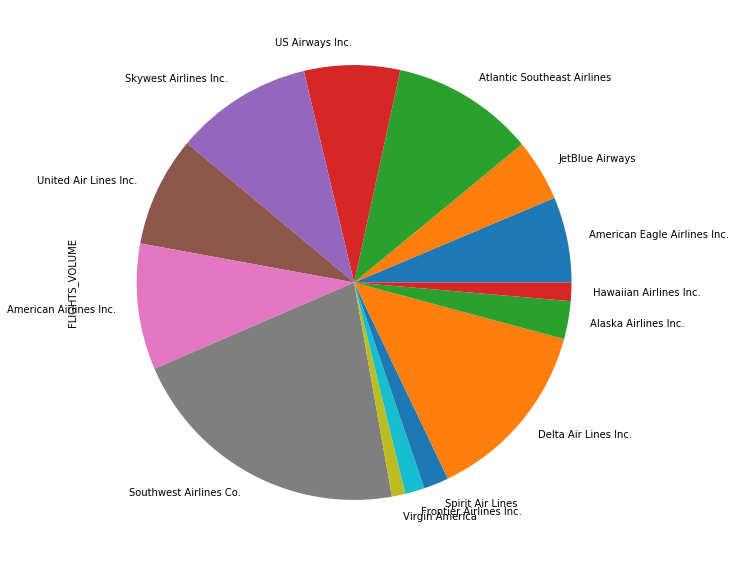

In [29]:
rank_airlines['FLIGHTS_VOLUME'] = flights.groupby('DESC_AIRLINE')['FLIGHT_NUMBER'].count()
#Let's change it into ratio of flight_vol/total flight_vol
total = rank_airlines['FLIGHTS_VOLUME'].sum()
rank_airlines['FLIGHTS_VOLUME'] = rank_airlines['FLIGHTS_VOLUME'].apply(lambda x:(x/float(total)))
rank_airlines['FLIGHTS_VOLUME'].plot.pie(figsize=(10,10),rot=45)

[Text(0.5, 0, 'Mean taxi out and in time (Taxi Out : Green,Taxi In : Yellow)')]

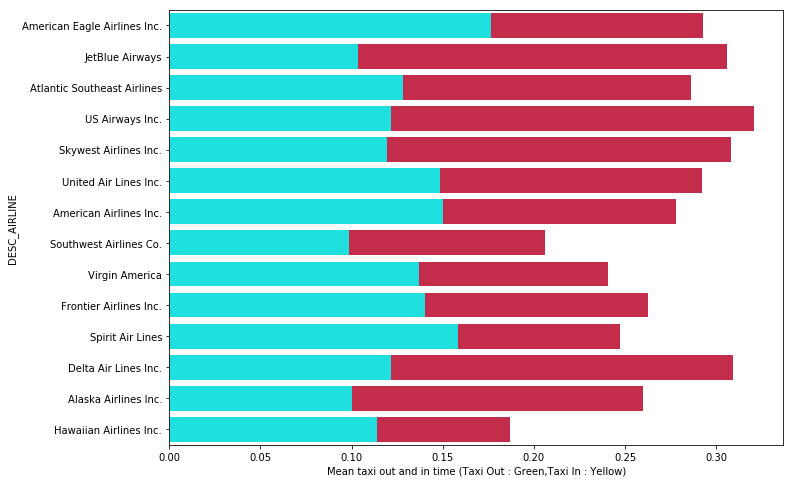

In [30]:
rank_airlines[['TAXI_IN','TAXI_OUT']] = flights.groupby('DESC_AIRLINE')[['TAXI_IN','TAXI_OUT']].mean()
#Taxi in and out time are in minutes.Let's change them to hours.
# rank_airlines[['TAXI_IN','TAXI_OUT']] = rank_airlines[['TAXI_IN','TAXI_OUT']].apply(lambda x, y : (x/float(60),y/float(60)))
rank_airlines['TAXI_IN'] = rank_airlines['TAXI_IN'].apply(lambda x:(x/float(60)))
rank_airlines['TAXI_OUT'] = rank_airlines['TAXI_OUT'].apply(lambda x:(x/float(60)))
plt.figure(figsize=(11, 8))
sns.set_color_codes("deep")
sns.set_context(font_scale=2.5)
plot = sns.barplot(x='TAXI_OUT',y=rank_airlines.index,data = rank_airlines,color = 'crimson')
plot = sns.barplot(x='TAXI_IN',y=rank_airlines.index,data = rank_airlines,color = 'cyan')
plot.set(xlabel='Mean taxi out and in time (Taxi Out : Green,Taxi In : Yellow)')

In [32]:
# I have scaled the data to 1-2
for i in rank_airlines.columns:
    rank_airlines[i] = ((rank_airlines[i]-rank_airlines[i].min())/(rank_airlines[i].max()-rank_airlines[i].min()))+1
a = rank_airlines.RATIO_OP_SCH*rank_airlines.FLIGHT_SPEED*rank_airlines.FLIGHTS_VOLUME
b = rank_airlines.ARRIVAL_DELAY*rank_airlines.TAXI_IN*rank_airlines.TAXI_OUT
rank_airlines['SCORE'] = a/(1+b)
rank_airlines.sort_values(['SCORE'],ascending=False,inplace=True)
rank_airlines.head()

,RATIO_OP_SCH,FLIGHT_SPEED,ARRIVAL_DELAY,FLIGHTS_VOLUME,TAXI_IN,TAXI_OUT,SCORE
DESC_AIRLINE,,,,,,,
Southwest Airlines Co.,1.812024,1.637739,1.266325,2.000000,1.000000,1.144008,2.423850
Delta Air Lines Inc.,1.910502,1.731326,1.000000,1.626266,1.290383,1.914566,1.549968
Alaska Airlines Inc.,1.989096,1.875416,1.084454,1.089455,1.018220,1.545278,1.501703
Virgin America,1.822411,1.928407,1.169822,1.000000,1.494529,1.400165,1.019257
American Airlines Inc.,1.773884,1.865355,1.441138,1.412628,1.660755,1.680582,0.930711


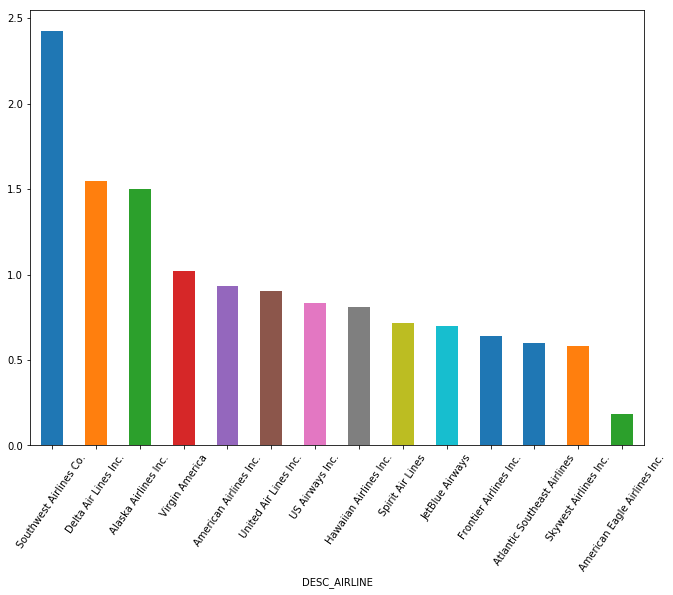

In [33]:
rank_airlines['SCORE'].plot.bar(figsize = (11,8),rot=55)

In [45]:
# Print recommand airlines
print("Recommand Airlines")
rank_airlines['SCORE'][:3]

Recommand Airlines


DESC_AIRLINE
Southwest Airlines Co.    2.423850
Delta Air Lines Inc.      1.549968
Alaska Airlines Inc.      1.501703
Name: SCORE, dtype: float64